In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d meruvulikith/190k-spam-ham-email-dataset-for-classification

Dataset URL: https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification
License(s): MIT
100% 107M/107M [00:00<00:00, 171MB/s] 
100% 107M/107M [00:00<00:00, 171MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/190k-spam-ham-email-dataset-for-classification.zip" # Changed the file name to the correct one.
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd

# Replace 'filename.csv' with the actual file name
data = pd.read_csv('/content/spam_Emails_data.csv')

# Display the first few rows of the dataset
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [ ]:
data.tail()

,label,text
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...
193851,Ham,this is an automatically generated delivery st...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [ ]:
# Create a mapping dictionary
label_mapping = {'Spam': 1, 'Ham': 0}

# Convert the 'label' column using the mapping
data['label'] = data['label'].map(label_mapping)

In [ ]:
data.head()


,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


**Text Preprocessing**

In [ ]:
import re
import string
import nltk

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary

    # Convert text to lowercase
    text = text.lower()


    # Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove emoticons and other symbols
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'', text)

    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    # Join words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Apply the preprocessing to the 'text' column and store in 'cleaned_text'
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the updated DataFrame
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,label,text,cleaned_text
0,1,viiiiiiagraaaa\nonly for the ones that want to...,viiiiiiagraaaa ones want make scream prodigy s...
1,0,got ice thought look az original message ice o...,get ice think look az original message ice ope...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,yo ur wom ne eds escapenumber ch n b e th n f ...
3,1,start increasing your odds of success & live s...,start increase odds success live sexually heal...
4,0,author jra date escapenumber escapenumber esca...,author jra date escapenumber escapenumber esca...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # Vocabulary size
max_sequence_length = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Convert labels to categorical (one-hot encoding)
num_classes = len(set(y_train)) # Calculate the number of unique classes in y_train
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes for the number of units

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2424/2424 ━━━━━━━━━━━━━━━━━━━━ 835s 343ms/step - accuracy: 0.9347 - loss: 0.1661 - val_accuracy: 0.9734 - val_loss: 0.0752
Epoch 2/5
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 861s 355ms/step - accuracy: 0.9821 - loss: 0.0535 - val_accuracy: 0.9804 - val_loss: 0.0577
Epoch 3/5
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 834s 344ms/step - accuracy: 0.9890 - loss: 0.0342 - val_accuracy: 0.9832 - val_loss: 0.0540
Epoch 4/5
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 853s 352ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9831 - val_loss: 0.0555
Epoch 5/5
2424/2424 ━━━━━━━━━━━━━━━━━━━━ 881s 360ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9840 - val_loss: 0.0608
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 87s 72ms/step - accuracy: 0.9855 - loss: 0.0541
Test Loss: 0.060777440667152405
Test Accuracy: 0.9839828610420227


In [ ]:
import joblib
# Save the tokenizer and model
with open('tokenizer.pkl', 'wb') as handle:
    joblib.dump(tokenizer, handle)

In [ ]:
# Save the model in the newer Keras format
model.save('lstm_model.keras')

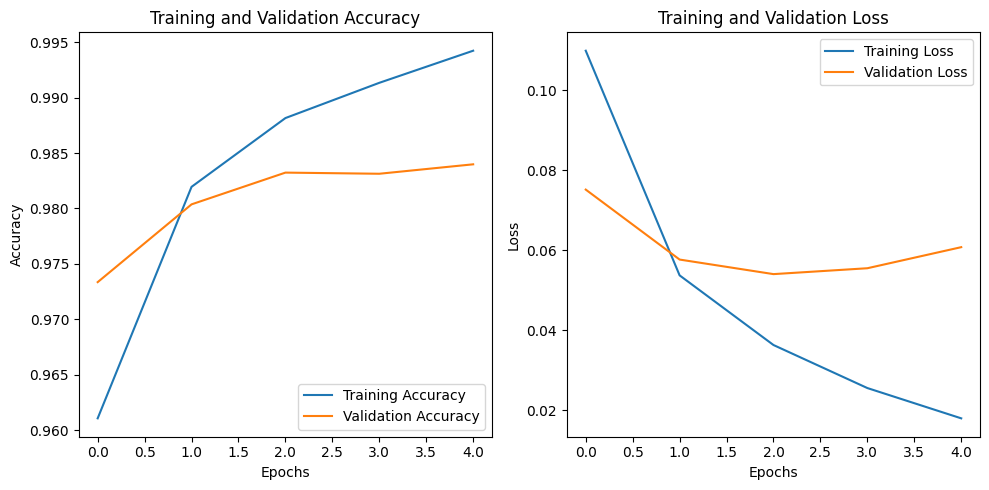

In [ ]:
import matplotlib.pyplot as plt

# Assume the number of epochs
EPOCHS = 5

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(EPOCHS), history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label="Training Loss")
plt.plot(range(EPOCHS), history.history['val_loss'], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")

# Display the plots
plt.tight_layout()
plt.show()